# Logistic Regression Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. 

Goal : We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Dictionary

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad: 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [7]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [8]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [9]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
#Statistical summary
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

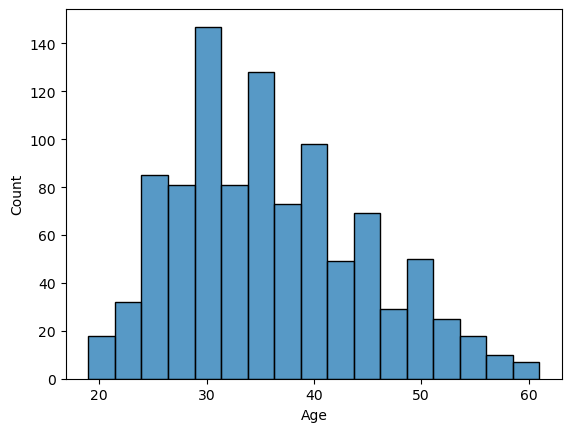

In [11]:
sns.histplot(ad_data["Age"])

**Create a jointplot showing Area Income versus Age.**

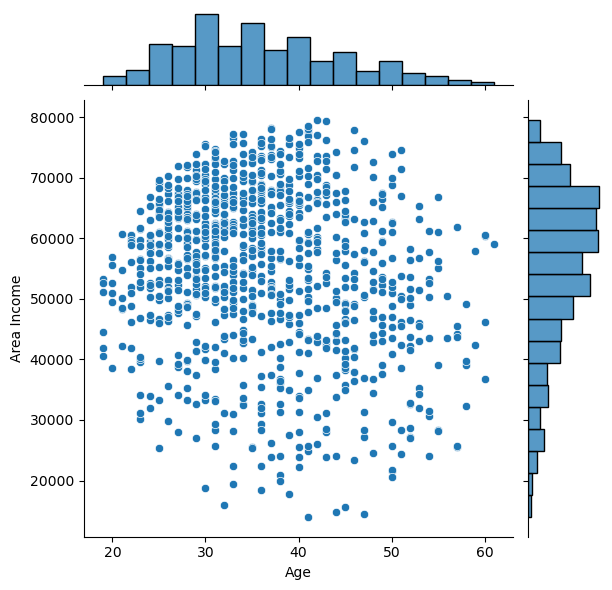

In [12]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing distributions of Daily Time spent on site vs. Age.**

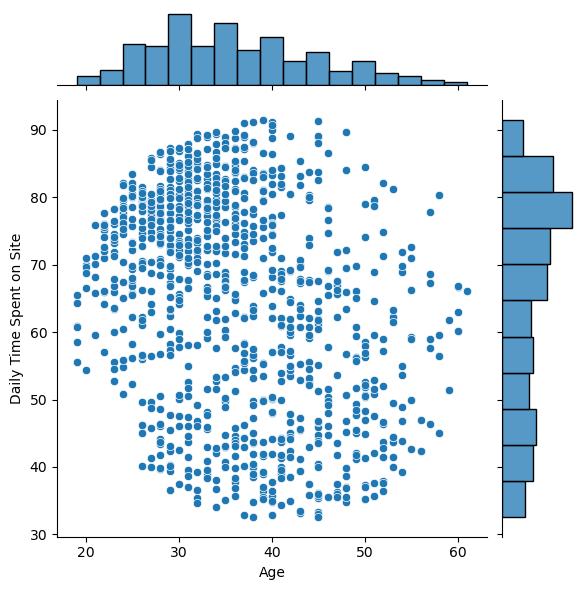

In [13]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data);

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

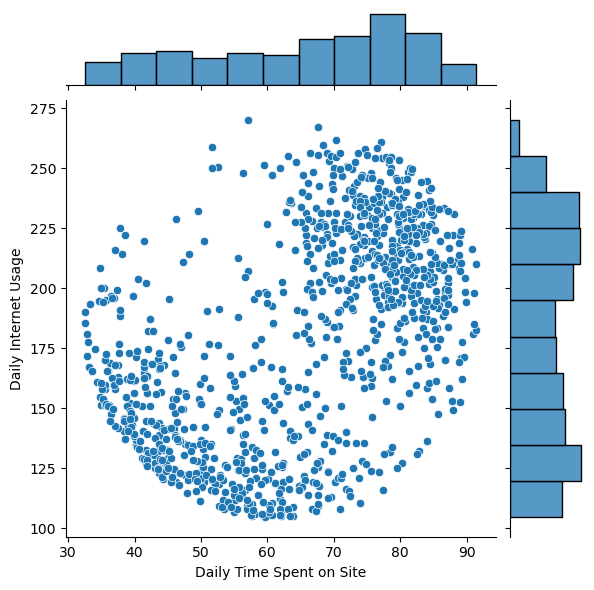

In [14]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data)

**Create bar plot that shows the total counts per target label.**

In [15]:
# 0 Didnt click on ad, 1 clicked.
ad_data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

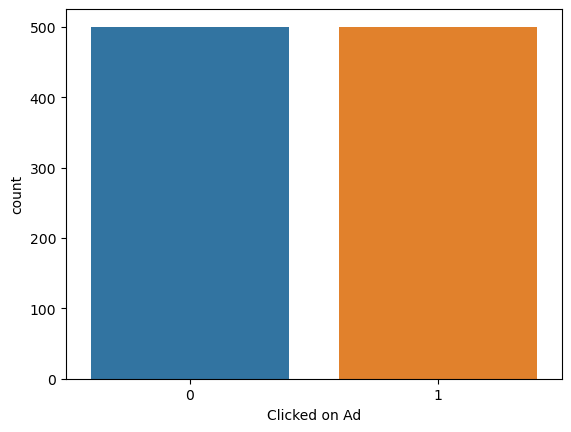

In [16]:
sns.countplot(x='Clicked on Ad',data=ad_data)

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

**Use the following columns:**

    ['Daily Time Spent on Site', 'Age', 'Area Income', 
    'Daily Internet Usage' , 'Clicked on Ad']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

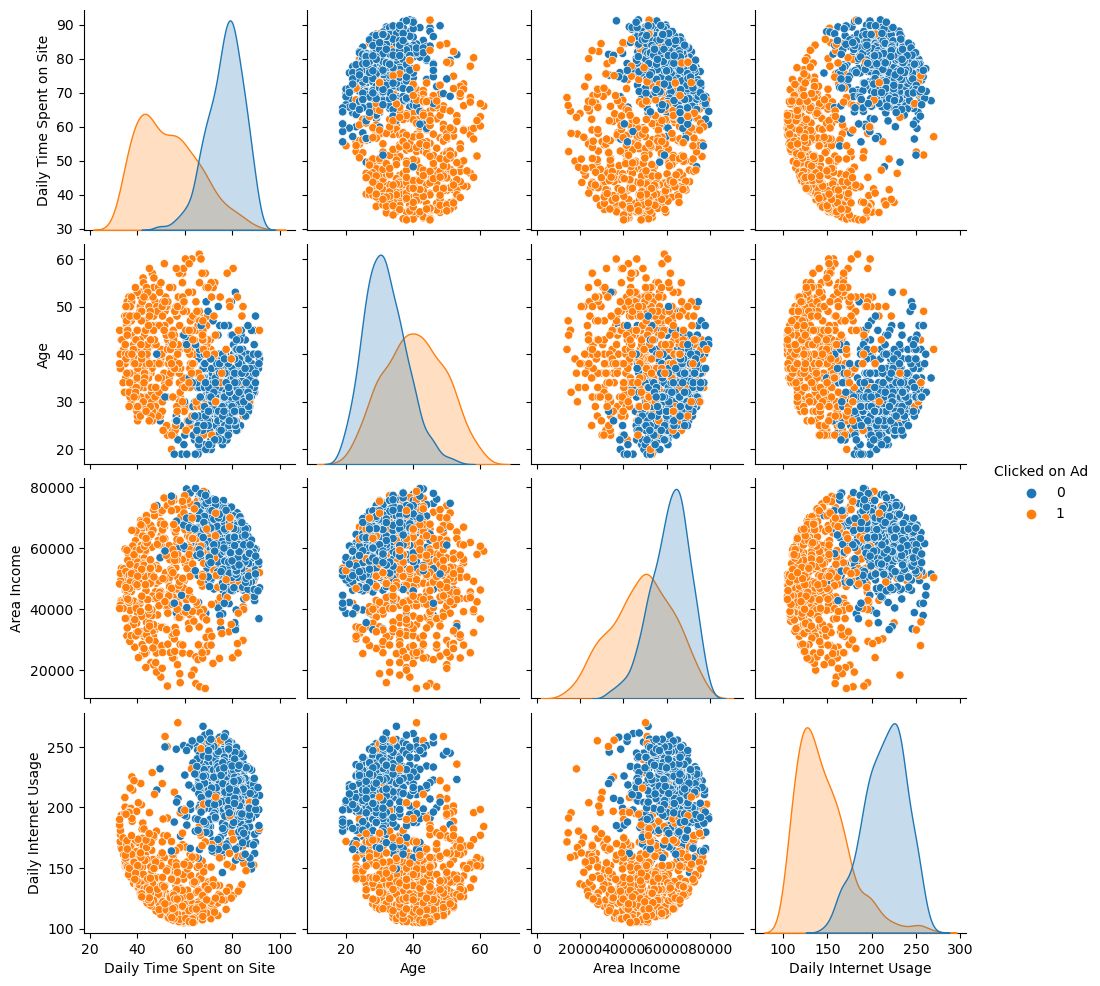

In [17]:
# 0 Didnt click on ad, 1 clicked.
sns.pairplot(ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 
'Daily Internet Usage' , 'Clicked on Ad']],hue='Clicked on Ad')

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

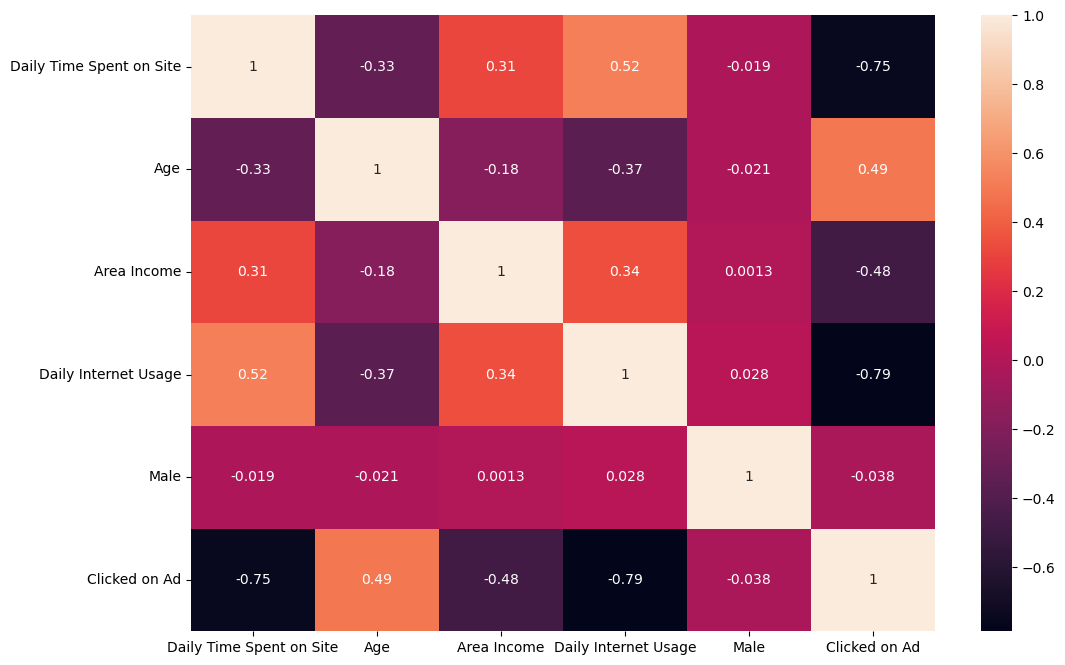

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(ad_data.corr(), annot=True)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
703,77.65,28,66198.66,208.01,0
311,69.74,49,66524.80,243.37,0
722,39.47,43,65576.05,163.48,1
629,73.94,26,55411.06,236.15,1
0,68.95,35,61833.90,256.09,0
...,...,...,...,...,...
106,72.23,25,46557.92,241.03,1
270,44.49,53,63100.13,168.00,1
860,91.37,45,51920.49,182.65,1
435,56.66,42,72684.44,139.42,0


**Create a StandardScaler object and normalize the X train and test set feature data.**

**Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Train and fit a logistic regression model on the training set.**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Coeffecients

**Report back the model's coefficients.**

In [29]:
logmodel.coef_

array([[-5.41795560e-02,  2.60352411e-01, -1.71334808e-05,
        -2.67117556e-02,  2.31129235e-03]])

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the **odds** and can not be directly interpreted as in linear regression.

**The estimated coefficients are the log odds. By exponentiating these values, we can calculate the odds, which are easier to interpret. Use np.exp()**

In [30]:
np.exp(logmodel.coef_)

array([[0.947262  , 1.29738722, 0.99998287, 0.97364185, 1.00231397]])

### Coefficient Interpretation (Pclass and Age)

This means:

* The odds for both Daily Time Spent on Site and Age are **positive**, meaning that they are **positively associated** with clicking the ad (**class 1**). 

* Let's focus on Daily Time Spent. We can interpret this as follows. For a 1 unit increase in Daily Time Spent we expect the odds of clicking the ad to increase by 0.9 times (94\%).

* On the other hand, as Age increases by 1 unit, the odds of clicking the ad are increased by 1.3 times (129%).

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**Create the following evaluations:**

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "confusion_matrix.jpg")

In [30]:
confusion_matrix(y_test,predictions)

array([[156,   6],
       [ 25, 143]], dtype=int64)

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


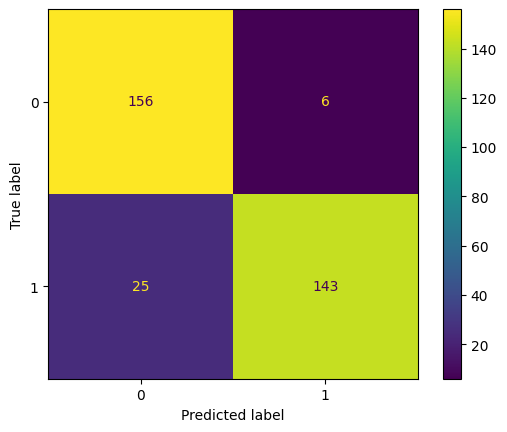

In [31]:
# Helps us plot the confusion matrix of a specific model. 
plot_confusion_matrix(logmodel,X_test,y_test)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_test, predictions)

0.959731543624161

In [35]:
recall_score(y_test, predictions)

0.8511904761904762

This reports precision, recall and F1-score per class (0 and 1).

Recall: When it actually is a Positive case, how often is it correct ?

Precision: When the Prediction is Positive, how often is it correct ?

F1-score : harmonic means of Precision and Recall.

**If Precision and Recall have a close value to your accuracy, you don't have a problem of imbalanced dataset.**

Support: How many rows you have in this class.

**The above matrix calculates scores per class and gives an average of differences. If we want precision or recall scores using the formulas we seen in theory :**

from sklearn.metrics import precision_score, recall_score

precision_score(y_test, predictions)

recall_score(y_test, predictions)

### Performance Curves

**Create both the precision recall curve and the ROC Curve.**

In [37]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


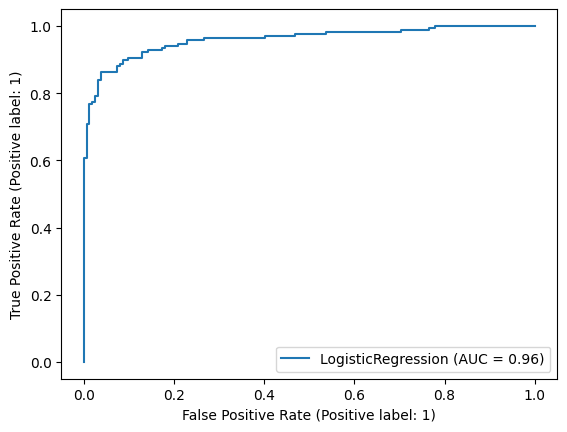

In [38]:
# Creates an ROC curve plot
plot_roc_curve(logmodel,X_test,y_test)

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


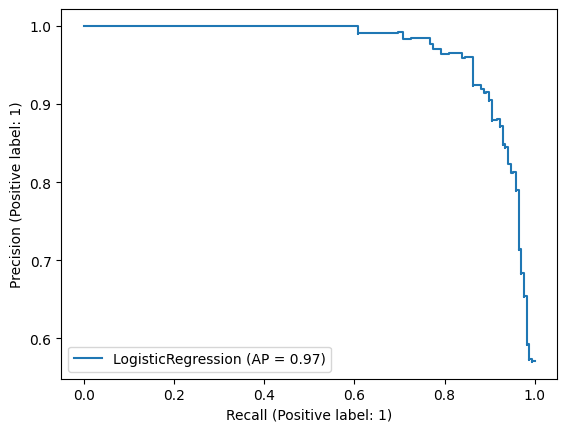

In [39]:
# Measure trade off between precision recall using precision recall curve
plot_precision_recall_curve(logmodel,X_test,y_test)

In [40]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


**Final Task: We want to predict based on the following features if this user will click on an ad or not ?**

    Daily Time Spent on Site    60
    Age                         48
    Area Income                 80520 
    Daily Internet Usage        400
    Male                        0

**What does your model predict for this user? Do they click the ad ? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the case above*

In [48]:
user_test_ad = [[60, 48, 80520, 400, 0]]

In [49]:
# 0 Didnt click on ad, 1 clicked.
logmodel.predict(user_test_ad)

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [50]:
logmodel.predict_proba(user_test_ad)

C:\Users\Mounir.Hafsa\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.94335954, 0.05664046]])

## Great Job!